# CAR PRICE PREDICTION

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [2]:
car_df = pd.read_csv('car_dataset.csv')
car_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
car_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4 MB


# Data Cleaning and EDA

In [4]:
car = car_df.dropna()
car = car.drop('Model', axis = 1)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [5]:
car.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


<Axes: xlabel='EngineV', ylabel='Count'>

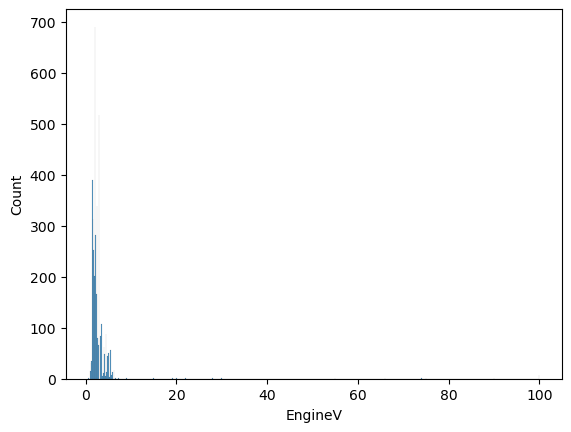

In [6]:
sns.histplot(car['EngineV'])

In [7]:
car = car.loc[car['EngineV'] < 6.5]
car.describe()

,Price,Mileage,EngineV,Year
count,4002.000000,4002.000000,4002.000000,4002.000000
mean,19615.045967,163.384058,2.466724,2006.395302
std,25870.138722,103.476924,0.973586,6.696077
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,6.300000,2016.000000


<Axes: xlabel='EngineV', ylabel='Count'>

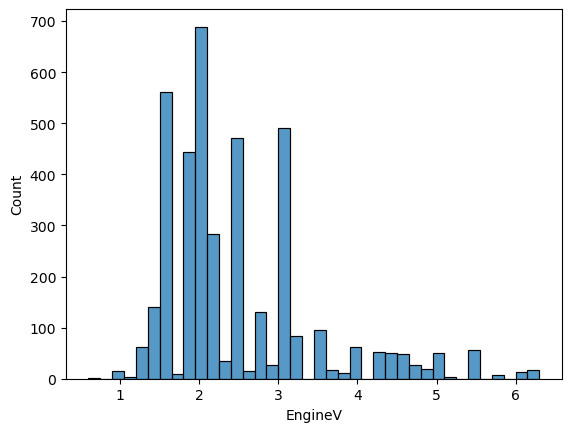

In [8]:
sns.histplot(car['EngineV'])

<Axes: xlabel='Mileage', ylabel='Count'>

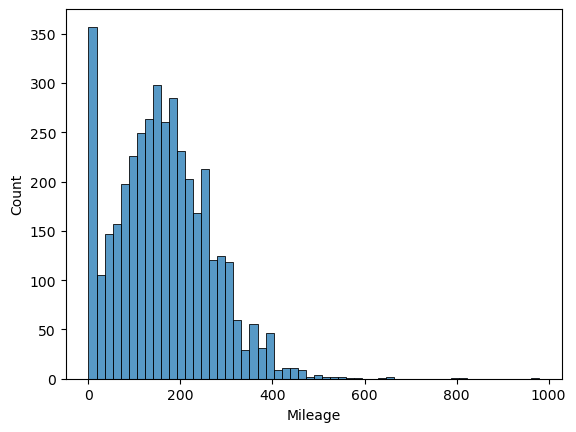

In [9]:
sns.histplot(car['Mileage'])

<Axes: xlabel='Mileage', ylabel='Count'>

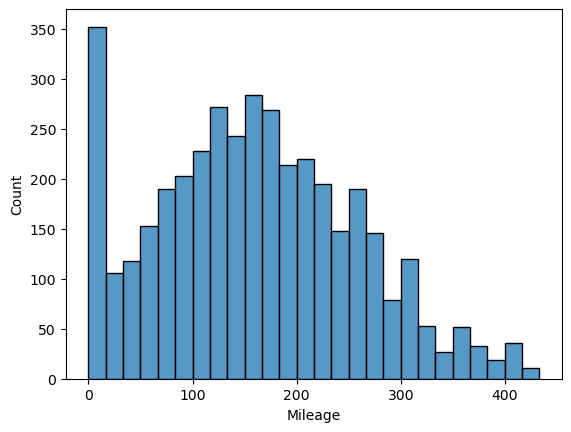

In [10]:
car = car.loc[car['Mileage'] < car['Mileage'].quantile(0.99)]
sns.histplot(car['Mileage'])

<Axes: xlabel='Price', ylabel='Count'>

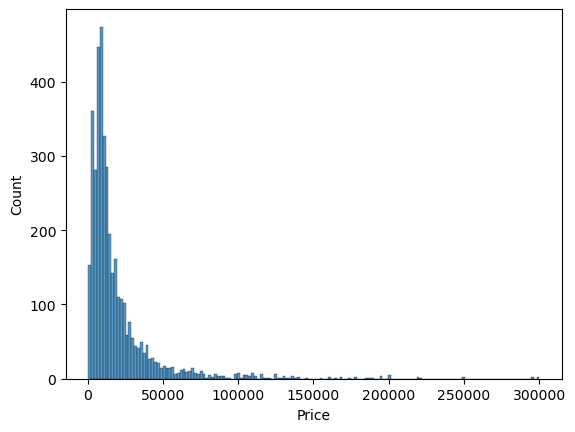

In [11]:
sns.histplot(car['Price'])

<Axes: xlabel='Price', ylabel='Count'>

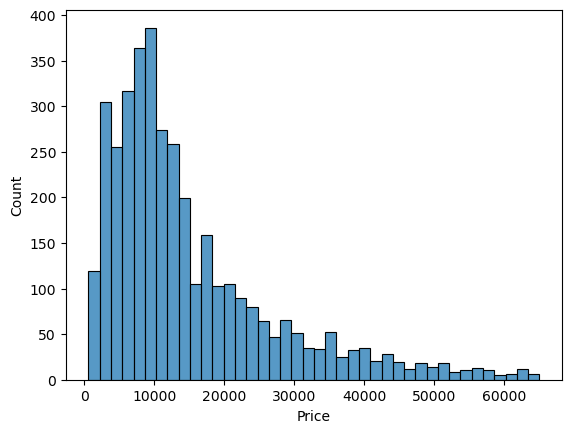

In [12]:
car = car.loc[car['Price'] < car['Price'].quantile(0.95)]
sns.histplot(car['Price'])

In [13]:
car.describe()

,Price,Mileage,EngineV,Year
count,3762.000000,3762.000000,3762.000000,3762.000000
mean,15063.642254,167.274588,2.401906,2006.055290
std,12273.344566,93.068531,0.917379,6.486615
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,100.000000,1.800000,2002.000000
50%,10999.000000,161.000000,2.000000,2007.000000
75%,19500.000000,230.000000,3.000000,2011.000000
max,64999.000000,433.000000,6.300000,2016.000000


<Axes: >

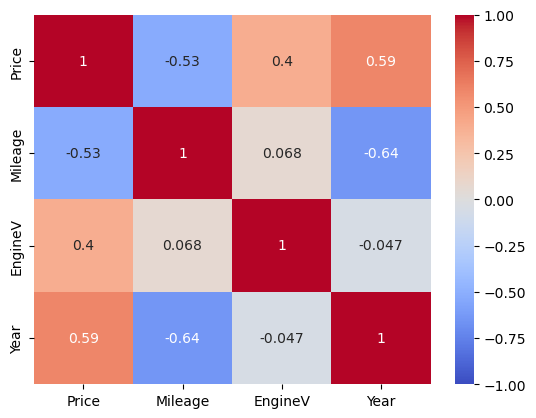

In [14]:
sns.heatmap(car.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

In [ ]:
sns.pairplot(car)

In [ ]:
car['log_price'] = np.log(car['Price'])
sns.pairplot(car.drop('Price', axis = 1))

In [ ]:
car.groupby('Brand').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

In [ ]:
car.groupby('Body').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

In [ ]:
car.groupby('Engine Type').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

In [ ]:
car.groupby('Registration').agg({'Price':'mean'}).sort_values('Price', ascending = False).plot.bar()

In [ ]:
car = car.drop(['Price'], axis = 1)

In [ ]:
df = pd.get_dummies(car, drop_first = True)
df

# Model Fitting

In [ ]:
X = sm.add_constant(df.drop('log_price', axis = 1))
y = df['log_price']

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
lm = sm.OLS(y, X).fit()
lm.summary()

In [ ]:
print(f"train R2: {r2(y, lm.predict(X))}")
print(f"train rmse: {mse(np.exp(y), np.exp(lm.predict(X)), squared = False)}")

# Checking Assumptions

In [ ]:
#Normality of errors
from scipy import stats
stats.probplot(lm.resid, dist = 'norm', plot = plt);

In [ ]:
#Equal variance of errors

sns.scatterplot(x = 'log_price', y = lm.resid, data = car)

In [ ]:
#Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = sm.OLS(y, X).exog
pd.Series([vif(variables, i) for i in range(variables.shape[1])])

In [ ]:
#Outliers Influence

lm.get_influence().summary_frame().loc[:,'cooks_d'].round(2).sort_values(ascending = False)

# Model Evaluation

In [ ]:
print(f"test R2: {r2(y_test, lm.predict(X_test))}")
print(f"test rmse: {mse(np.exp(y_test), np.exp(lm.predict(X_test)), squared = False)}")